<a href="https://colab.research.google.com/github/KhyatiGupta8/Projects/blob/master/CategoricalVariableRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.formula.api as sm
import statsmodels.api as s

from sklearn.linear_model import LinearRegression

from scipy import stats


In [3]:
df=pd.read_csv('/content/dummy.csv')
df

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'Simple Linear Regression')

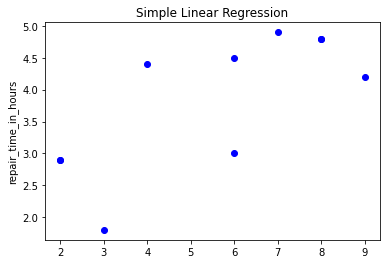

In [4]:
plt.scatter(df['months_since_last_service'],df['repair_time_in_hours'],color='blue')
plt.ylabel('repair_time_in_hours')
plt.title('Simple Linear Regression')

In [5]:
reg = sm.ols('repair_time_in_hours ~months_since_last_service',data=df)
fit1 = reg.fit()
fit1.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Sun, 01 Aug 2021   Prob (F-statistic):             0.0163
Time:                          10:14:00   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.1473      0.605      3.549      0.008       0.752       3.542
months_since_last_service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Normal Probability plot

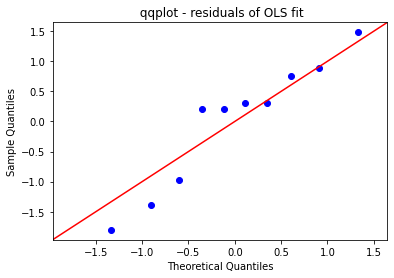

In [7]:
res = fit1.resid #residual
probplot = s.ProbPlot(res,stats.norm,fit=True)

fig = probplot.qqplot(line='45')
h= plt.title(' qqplot - residuals of OLS fit')
plt.show()

###Creating dummies

In [8]:
dum = pd.get_dummies(df['type_of_repair'])
dum

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [13]:
new_df = pd.concat([df,dum,],axis=1)
new_df.drop(['type_of_repair','mechanical'],inplace=True,axis=1)

In [14]:
new_df

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


We got rid of terms electrical andd mechanical , and now regression could be performed

In [19]:
reg2=sm.ols('repair_time_in_hours ~ months_since_last_service + electrical',data=new_df).fit()

reg2.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Sun, 01 Aug 2021   Prob (F-statistic):            0.00105
Time:                          10:29:20   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.9305      0.467      1.993      0.087      -0.174       2.035
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We know b2 = 1.2627 , which is positive .

Interpretation from b2 is that it indicates the difference betweene the mean repair time of an electrical repair and mechanical repair.

If b2 is positive ,the mean repair time for electrical repair > mean repair time of mechanical repair.If b2 if negative ,then vice-versa.And if b2=0, there is no relation between type of repair and repair time.

In [20]:
df2 = pd.read_csv('/content/dummy2.csv')
df2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Simple linear regression')

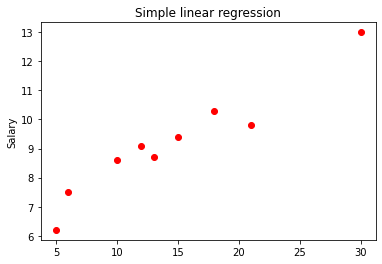

In [21]:
plt.scatter(df2['Experience'],df2['Salary'],color='red')
plt.ylabel('Salary')
plt.title('Simple linear regression')

In [23]:
regg = sm.ols('Salary ~ Experience',data=df2)
fitt = regg.fit()
fitt.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           3.30e-05
Time:                        10:41:49   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.000       4.854       6.764
Experience     0.2332      0.025      9.360      0.000       0.174       0.292
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.432
Skew:                          -0.918   Prob(JB):                        0.489
Kurtosis:                       2.331   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
influence = fitt.get_influence()
resid_student = influence.resid_studentized_external

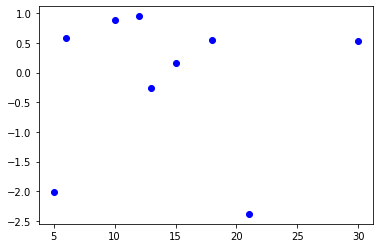

In [25]:
plt.figure()
plt.scatter(df2['Experience'],resid_student,color='blue')

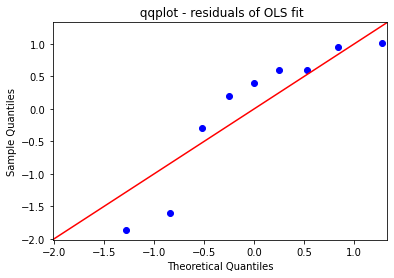

In [28]:
res1 = fitt.resid #residual
probplot1 = s.ProbPlot(res1,stats.norm,fit=True)

fig1 = probplot1.qqplot(line='45')
h1= plt.title(' qqplot - residuals of OLS fit')
plt.show()

In [29]:
just_dum =pd.get_dummies(df2['Gender'])
just_dum

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [30]:
rep =pd.concat([df2,just_dum],axis=1)
rep.drop(['Gender','Male'],inplace=True,axis=1)

res2=sm.ols('Salary ~ Female',data=rep).fit()
res2.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Sun, 01 Aug 2021   Prob (F-statistic):              0.389
Time:                        10:48:33   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7000      0.853     11.367      0.000       7.682      11.718
Female        -1.1750      1.280     -0.918      0.389      -4.202       1.852
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.280
Skew:                           0.330   Prob(JB):                        0.869
Kurtosis:                       2.441   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-1.175 tells avg salary of females is less than males by 1.175

In [31]:
res3 = sm.ols('Salary ~ Experience + Female',data=rep).fit()
res3.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           1.80e-05
Time:                        10:51:55   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2485      0.291     21.439      0.000       5.535       6.962
Experience     0.2271      0.016     14.089      0.000       0.188       0.267
Female        -0.7890      0.238     -3.309      0.016      -1.372      -0.206
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         44.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lastly , the values of male anf female salaries wont change no matter how dummy variable is coded.